# Dimensionality Reduction Techniques
		Principal Component Analysis
1.Apply PCA for a dataset given in the url, build a classification model and plot the graph


In [1]:
# import all the libraries
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import pickle

In [2]:
# load the dataset
dataset = pd.read_csv('Wine.csv') 
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [5]:
# Checking for the null values
dataset.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [6]:
# checking for the duplicate values
dataset.duplicated().sum()

0

In [7]:
# devide the data into x(independent variables 0 to 12) and y(dependent variable 13th) 
x_data = dataset.iloc[:, 0:13].values
y_data = dataset.iloc[:, 13].values

x_data.shape, y_data.shape

((178, 13), (178,))

### Preprocessing

In [8]:
# import os,sys
# os.mkdir('CSV_files')

In [9]:
# split dataset into train,test and cross validation , also load these data into csv files 
def splitdata(x,y,size1,size2):
    # split train and test data
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = size1, random_state=0)
    print("x_train : ", x_train.shape, " x_test : ", x_test.shape)

    #Saving testing file into pickle file
    test_file = open("CSV_files/Testing_file.csv","wb")
    pickle.dump(x_test, test_file)
    pickle.dump(y_test, test_file) 
    test_file.close()

    # divide train data into train and cross validation 
    x_train1, x_cv,  y_train1, y_cv = train_test_split(x_train,y_train, test_size = size2,random_state=0)
    print("x_train_data : ", x_train1.shape, " x_crossV_data : ", x_cv.shape)

    return x_train1, x_cv,  y_train1, y_cv
        
x_train, x_cv,  y_train, y_cv = splitdata(x_data,y_data,0.2,0.2)

x_train :  (142, 13)  x_test :  (36, 13)
x_train_data :  (113, 13)  x_crossV_data :  (29, 13)


In [10]:
# Feature Scaling on x_data
def feature_Scaling(x_data, x_cv):
    sc = StandardScaler()
    x_data = sc.fit_transform(x_data)
    x_cv = sc.transform(x_cv)
    return sc, x_data, x_cv
sc, x_train, x_cv = feature_Scaling(x_train, x_cv)

In [11]:
#Applying PCA
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_cv = pca.transform(x_cv)
# explained_varience = pca.explained_variance_ratio_

In [12]:
x_train.shape, x_cv.shape

((113, 2), (29, 2))

In [13]:
# When PCA(n_components = 2)
print('X_train:',x_train.shape), print('X_cv',x_cv.shape)
x_train

X_train: (113, 2)
X_cv (29, 2)


array([[ 1.15024282,  1.4215091 ],
       [ 1.03577004,  2.21536107],
       [-2.23234517,  0.42972436],
       [-3.78666848, -0.48939831],
       [-2.90145469, -0.3234289 ],
       [ 0.05463754,  2.10353426],
       [-2.28776234, -0.14377339],
       [ 2.77204374, -1.76980352],
       [ 3.12797226, -1.25703798],
       [-1.10263771,  0.85147107],
       [ 4.36040367, -2.24281508],
       [-1.53605307,  1.43960975],
       [ 0.83639367,  1.41880877],
       [-3.19504967, -2.19067525],
       [ 0.51732677,  2.04735221],
       [-2.47032947, -0.66323966],
       [-0.55945137,  2.06841765],
       [ 0.58117682,  4.0076399 ],
       [-1.3385477 ,  1.47815614],
       [ 1.71850464,  0.51791799],
       [ 0.9158247 , -0.65780003],
       [ 3.17964806, -1.80434276],
       [-3.28646495, -1.13045489],
       [-3.42722511, -1.76599153],
       [ 2.82502388, -0.88390452],
       [-0.49394137,  2.57731872],
       [ 2.16995784, -2.24129863],
       [ 3.12006384, -0.78459454],
       [-2.63138489,

### Load train model into Logistic regression

In [14]:
# fitting logistinc regression to the training set
classifier = LogisticRegression(random_state=0)
classifier = classifier.fit(x_train,y_train)

/home/admin1/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/admin1/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
# predict y data
y_pred = classifier.predict(x_cv)

In [16]:
cm = confusion_matrix(y_cv, y_pred)
print(cm)

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  8]]


### Accuracy 

In [17]:
print(classification_report(y_cv, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.92      0.96        12
           3       0.89      1.00      0.94         8

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29



### Visualisation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


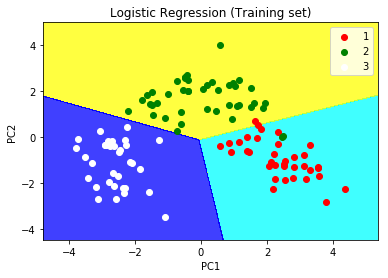

In [18]:
X_set, Y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('cyan', 'yellow', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c = ListedColormap(('red', 'green', 'white'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Store train model into pickle file

In [19]:
file1 = open('Train_model.pickle','wb')
pickle.dump(classifier, file1)
pickle.dump(sc, file1)
# pickle.dump(pca, file1)
file1.close()

In [20]:
file2 = open('Train_model1.pickle','wb')
# pickle.dump(classifier, file2)
# pickle.dump(sc, file2)
pickle.dump(pca, file2)
file2.close()